Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



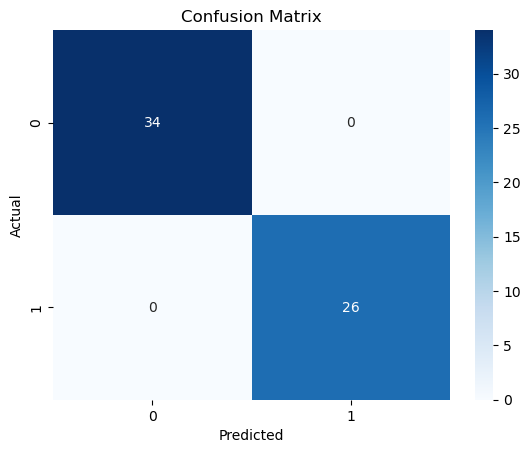

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Sample reviews
positive = ['Absolutely love it!', 'Exceeded expectations.', 'Amazing product!', 'Very satisfied.', 'Highly recommend!']
negative = ['Worst product ever.', 'Do not buy.', 'Terrible experience.', 'Completely useless.', 'Not worth the money.']

# Multiply and shuffle
reviews = positive*20 + negative*20
sentiments = [1]*100 + [0]*100
data = list(zip(reviews, sentiments))
random.shuffle(data)
df = pd.DataFrame(data, columns=['review', 'sentiment'])
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return re.sub(r'\s+', ' ', text).strip()
df['clean_review'] = df['review'].apply(preprocess)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
